In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('SpamSMS_dataset.csv',encoding = "ISO-8859-1")
# read_csv takes an encoding option to deal with files in different formats. I mostly use read_csv('file', encoding = "ISO-8859-1"),
#or alternatively encoding = "utf-8" for reading, and generally utf-8 for to_csv

data cleaning

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2246,spam,Hi ya babe x u 4goten bout me?' scammers getti...,NaN,NaN,NaN
4672,ham,I forgot 2 ask Ì_ all smth.. There's a card on...,NaN,NaN,NaN
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I...",NaN,NaN,NaN
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
561,ham,Thanx 4 e brownie it's v nice...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#deleting the last 3 columns
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3608,ham,Joy's father is John. Then John is the ____ of...
5133,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
3993,ham,I love to cuddle! I want to hold you in my str...


In [ ]:
#convert ham spam to numbers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,text
4906,0,Then anything special?
5385,0,How do friends help us in problems? They give ...
4822,0,:-) :-)
4079,0,"Sir, good morning. Hope you had a good weekend..."
5324,0,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee..."


In [ ]:
# for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# for duplicates
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

EDA

In [ ]:
print(df['target'].value_counts())
print(type(df['target'].value_counts())) # pandas return in pandas format

0    4516
1     653
Name: target, dtype: int64
<class 'pandas.core.series.Series'>


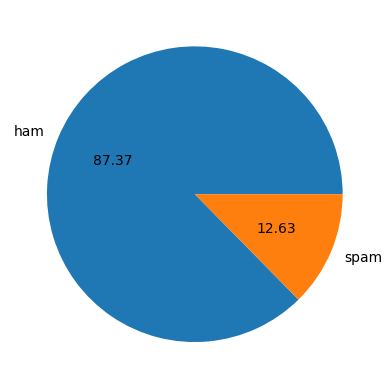

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show() # for not getting extra code

In [ ]:
#all these libs are compatible
#t=np.array(df['target'].value_counts())
#plt.pie(t,labels=['ham','spam'],autopct='%0.2f')

In [ ]:
import nltk
nltk.download('punkt') # nltk have some dependencies so it tke care of that

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#it gives length of each string of text(our data ppint)
df['char']=df['text'].apply(len)

In [ ]:
df.sample(5)

,target,text,char
2779,0,Well I might not come then...,29
1908,0,Hello beautiful r u ok? I've kinda ad a row wi...,106
2857,0,In life when you face choices Just toss a coin...,160
4912,1,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...",155
5468,1,URGENT! Last weekend's draw shows that you hav...,143


In [ ]:
#for number of words
# write lambda function and when you get text x nltk will tokenize that to words
df['text'].apply(lambda x:nltk.word_tokenize(x))

#now can see we get list of words using this

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
#apply len to it
print(df['text'].apply(lambda x:len(nltk.word_tokenize(x))))

df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64


In [ ]:
df.sample(5)

,target,text,char,words
2503,0,Fwiw the reason I'm only around when it's time...,202,42
4407,0,Take care and sleep well.you need to learn to ...,283,51
4289,0,"For you information, IKEA is spelled with all ...",290,68
4119,0,Babe! How goes that day ? What are you up to ?...,126,32
2416,0,"Could you not read me, my Love ? I answered you",47,12


In [ ]:
# for sentences we use sent_tokienize
df['sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,target,text,char,words,sentences
3330,0,How much it will cost approx . Per month.,41,10,2
2078,1,85233 FREE>Ringtone!Reply REAL,30,7,1
381,0,"Yeah sure, give me a couple minutes to track d...",59,13,1
1730,0,Doing project w frens lor.,27,6,1
4073,0,A lot of this sickness thing going round. Take...,84,20,4


In [ ]:
df[['char','words','sentences']].describe()

,char,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for getting description of those data points whose target is 0 or ham
df[df['target']==0][['char','words','sentences']].describe()

,char,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam
df[df['target']==1][['char','words','sentences']].describe()

,char,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char', ylabel='Count'>

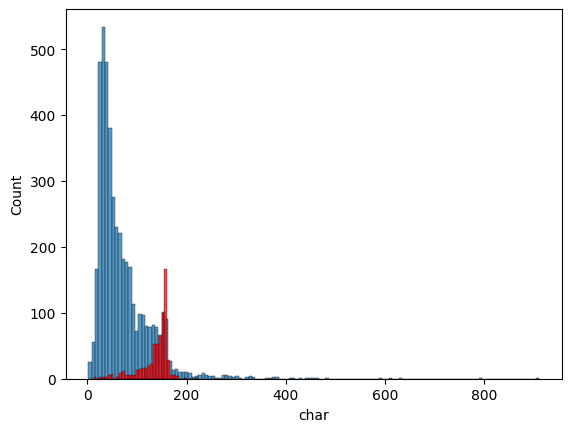

In [ ]:
#plotting historgram for better visualisation
import seaborn as sns
sns.histplot(df[df['target']==0]['char'])
sns.histplot(df[df['target']==1]['char'],color='red')

#zadatar ham messages zada char se bane hai aur zadatr spam messages kam char se bane hain

<Axes: xlabel='words', ylabel='Count'>

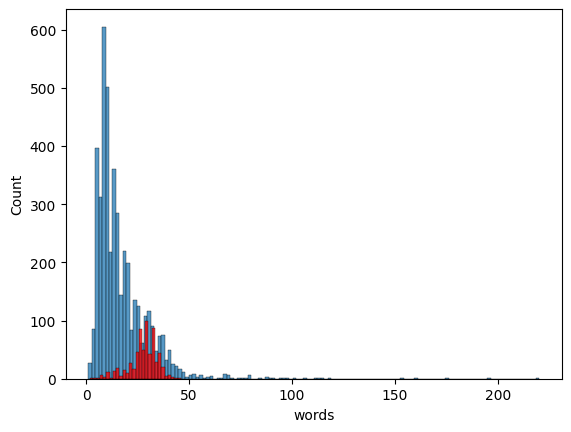

In [ ]:
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')

<Axes: xlabel='sentences', ylabel='Count'>

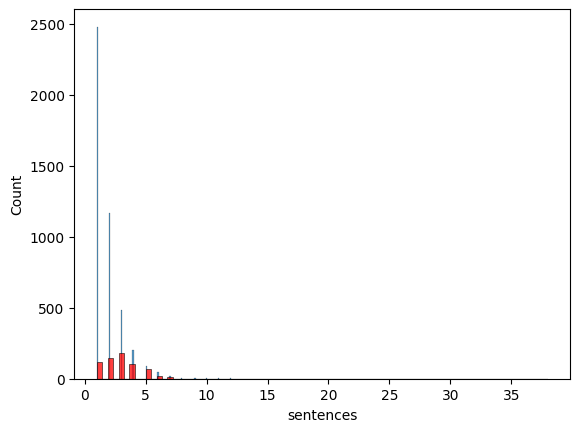

In [ ]:
sns.histplot(df[df['target']==0]['sentences'])
sns.histplot(df[df['target']==1]['sentences'],color='red')

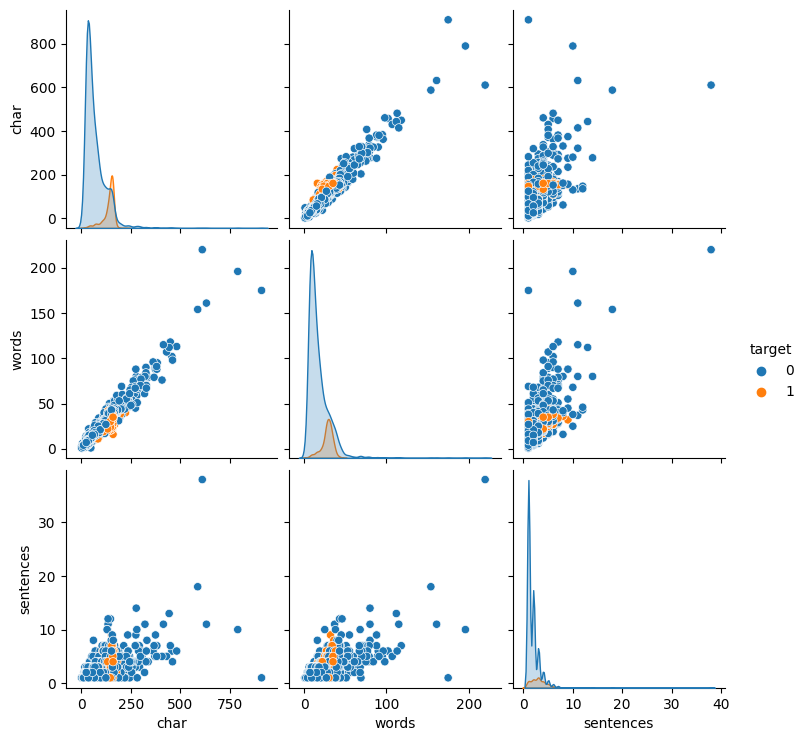

In [ ]:
#for relationship between these columns with each other
sns.pairplot(df,hue='target')

In [ ]:
# there are outliers in dataset

In [ ]:
#correlation
df.corr()

<ipython-input-34-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,char,words,sentences
target,1.000000,0.384717,0.262912,0.263939
char,0.384717,1.000000,0.965760,0.624139
words,0.262912,0.965760,1.000000,0.679971
sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-35-7e9024cf0497>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

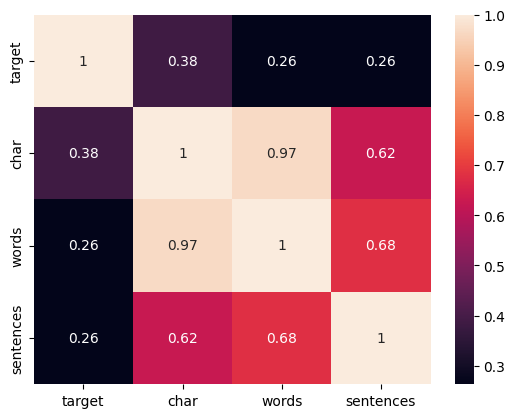

In [ ]:
#using heatmap to visualize
sns.heatmap(df.corr(),annot=True)

#target vs char is 0.38 means jitne zada char badhte hain 1 hone ka(spam hone ka) tendency badhta hai

# multi corelation is there
#sen vs char and sen vs words is very high

#highest is of words vs char

#there is very strong correlation between features words char sentences so we have to chosse only one
# and we will choose char beacuse char vs target is highest

In [ ]:
# now we will see top words used in ham and spam

data preprocessing-
1. lower case
2. tokenization
3. removing special characters
4. removing stop words and punctuation
5. stemming

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# making function that do all these tasks


def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=list()
  for i in text:
    if i.isalnum():
      y.append(i)

  #text=y  list is mutable datatype donot copy like this
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) # for returning the string of list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text('I Loved, loving the way people love each other...?')

'love love way peopl love'

In [ ]:
# what are stopwords
#nltk.download('stopwords') # for downloading nltk stopwords


#from nltk.corpus import stopwords
#stopwords.words('english')

In [ ]:
# for punctuation marks
#import string
#string.punctuation

In [ ]:
#for stemming we need nltk only
#from nltk.stem.porter import PorterStemmer
#ps=PorterStemmer()
#print(ps.stem('dancing'))
#print(ps.stem('going'))
#print(ps.stem('clubbing'))
#print(ps.stem('loving'))

In [ ]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,char,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#now we see what words are more in spam and in ham
# make word cloud

from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# generate function is for getting data into word cloud from dataset
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))   #.str for taking out string from that .cat for concatinatn
# concatinate on top of space

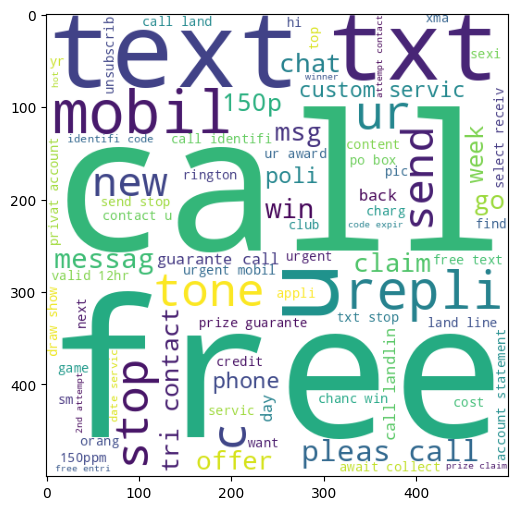

In [ ]:
#for display it we need plt.imshow
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

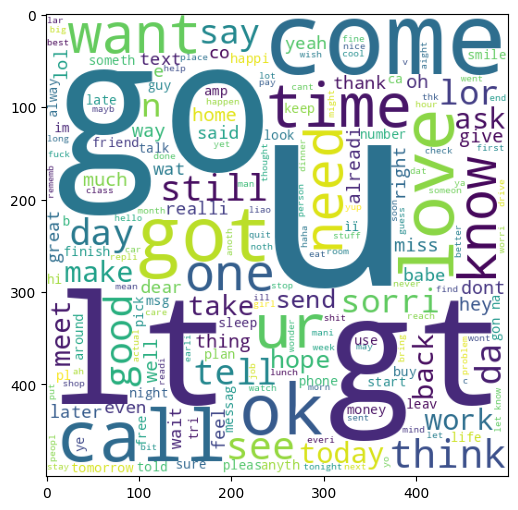

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
# now taking out top words from ham and spam
spam_corpus=list()
l0=df[df['target']==1]['transformed_text'].tolist() #it gives list of strings

for i in l0:
  for word in i.split():
    spam_corpus.append(word)
l0.clear()

In [ ]:
len(spam_corpus)

9939

<Axes: xlabel='1', ylabel='0'>

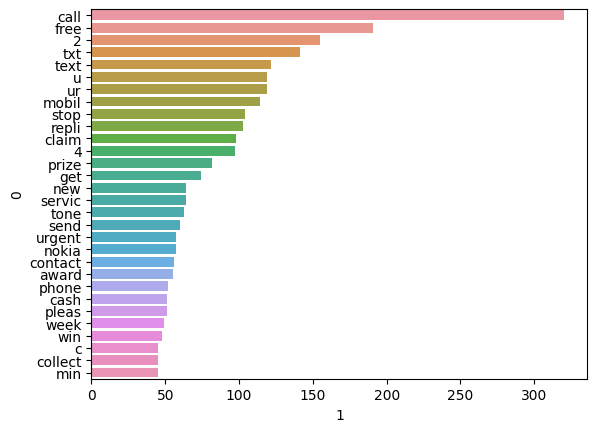

In [ ]:
from collections import Counter
Counter(spam_corpus) # it will give all words and their count
Counter(spam_corpus).most_common(30) #give top 30
ddff_spam=pd.DataFrame(Counter(spam_corpus).most_common(30)) # convert to data frame
# now we will bar plot this

#sns.barplot(x=ddff_spam[0],y=ddff_spam[1])
#plt.xticks(rotation='vertical') for showing lebel or words verticle
#but i choose to put them on verticle means switch the axis
sns.barplot(x=ddff_spam[1],y=ddff_spam[0])

<Axes: xlabel='1', ylabel='0'>

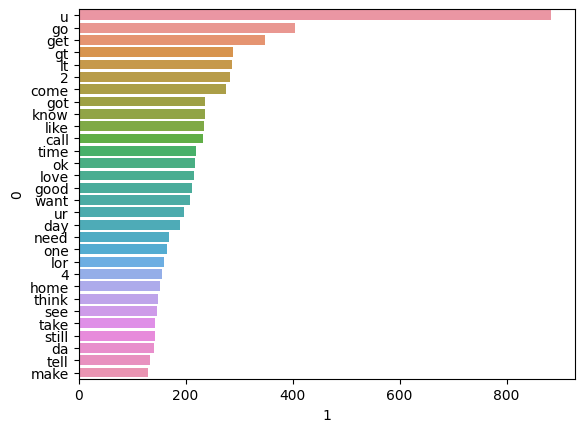

In [ ]:
#for ham
ham_corpus=list()
l0=df[df['target']==0]['transformed_text'].tolist() #it gives list of strings

for i in l0:
  for word in i.split():
    ham_corpus.append(word)


Counter(ham_corpus) # it will give all words and their count
Counter(ham_corpus).most_common(30) #give top 30
ddff_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=ddff_ham[1],y=ddff_ham[0])

Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [ ]:
#X=cv.fit_transform(df['transformed_text']) stored in compressed sparse format so need to convert into dense matrix
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#now we split out dataset into train test

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #test size is 20 percent

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # because we dont know distribution of data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_predg=gnb.predict(X_test)
print(accuracy_score(y_test,y_predg))
print(confusion_matrix(y_test,y_predg))
print(precision_score(y_test,y_predg))  # accuracy zada matter nahi karta precision krta hai kyuki imbalanced data hai to precision zada chahiye

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train,y_train)
y_predm=mnb.predict(X_test)
print(accuracy_score(y_test,y_predm))
print(confusion_matrix(y_test,y_predm))
print(precision_score(y_test,y_predm))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train,y_train)
y_predb=bnb.predict(X_test)
print(accuracy_score(y_test,y_predb))
print(confusion_matrix(y_test,y_predb))
print(precision_score(y_test,y_predb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#instead of bag of words we use tfidf for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #test size is 20 percent

(5169, 6708)


In [ ]:
gnb.fit(X_train,y_train)
y_predg=gnb.predict(X_test)
print(accuracy_score(y_test,y_predg))
print(confusion_matrix(y_test,y_predg))
print(precision_score(y_test,y_predg))  # accuracy zada matter nahi karta precision krta hai kyuki imbalanced data hai to precision zada chahiye

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(X_train,y_train)
y_predm=mnb.predict(X_test)
print(accuracy_score(y_test,y_predm))
print(confusion_matrix(y_test,y_predm))
print(precision_score(y_test,y_predm))
# a lot of improvement in this compare to bag of words in mnb in the precision, accury a little bit less

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_predb=bnb.predict(X_test)
print(accuracy_score(y_test,y_predb))
print(confusion_matrix(y_test,y_predb))
print(precision_score(y_test,y_predb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# we will go with mnb with tfidf

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc=LogisticRegression()
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2) #varient of random forest, it is more random
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc=XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
classifiers={'lrc':lrc,'svc':svc,'dtc':dtc,'knc':knc,'rfc':rfc,'abc':abc,'bc':bc,'etc':etc,'gbc':gbc,'xgbc':xgbc,'mnb':mnb}

In [ ]:
def classifier_train(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  precision=precision_score(y_test,y_pred)
  accuracy=accuracy_score(y_test,y_pred)

  return accuracy,precision


In [ ]:
classifier_train(lrc,X_train,X_test,y_train,y_test)

(0.9468085106382979, 0.9882352941176471)

In [ ]:
precision_scores=list()
accuracy_scores=list()

for name,clf in classifiers.items():
  accuracy_c,precision_c=classifier_train(clf,X_train,X_test,y_train,y_test)

  accuracy_scores.append(accuracy_c)
  precision_scores.append(precision_c)
  print('for ',name)
  print('acc=',accuracy_c)
  print('pre=',precision_c)
  print('\n')

for  lrc
acc= 0.9468085106382979
pre= 0.9882352941176471


for  svc
acc= 0.9729206963249516
pre= 0.9741379310344828


for  dtc
acc= 0.9352030947775629
pre= 0.8380952380952381


for  knc
acc= 0.9003868471953579
pre= 1.0


for  rfc
acc= 0.971953578336557
pre= 1.0


for  abc
acc= 0.9613152804642167
pre= 0.9454545454545454


for  bc
acc= 0.9584139264990329
pre= 0.8625954198473282


for  etc
acc= 0.9729206963249516
pre= 0.9824561403508771


for  gbc
acc= 0.9526112185686654
pre= 0.9238095238095239


for  xgbc
acc= 0.9700193423597679
pre= 0.9349593495934959


for  mnb
acc= 0.9593810444874274
pre= 1.0




In [ ]:
performance_df=pd.DataFrame({'Algorithms':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
#making datafram from  dict

In [ ]:
performance_df

,Algorithms,Accuracy,Precision
3,knc,0.900387,1.000000
4,rfc,0.971954,1.000000
10,mnb,0.959381,1.000000
0,lrc,0.946809,0.988235
7,etc,0.972921,0.982456
1,svc,0.972921,0.974138
5,abc,0.961315,0.945455
9,xgbc,0.970019,0.934959
8,gbc,0.952611,0.923810
6,bc,0.958414,0.862595


In [ ]:
#knc rf and mnb have precision highest but we dont consider knc as accuracy is very less
#so rfc mnb lrc and etc can be considered according to seeing wrt precision and accuracy

In [ ]:
#sns.catplot(data=performance_df,kind='bar') donot understand this plotting of catplot

In [ ]:
#sns.barplot(x=performance_df['Algorithms'],y=performance_df['Precision'])
#sns.barplot(x=performance_df['Algorithms'],y=performance_df['Accuracy']) catplot should be used

In [ ]:
# Model Improvement

In [ ]:
# now we go with tfidf vectorizer taking top 3000 words from corpus(tuning hyperparameter) as default is i think 1k words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



precision_scores_3k=list()
accuracy_scores_3k=list()

for name,clf in classifiers.items():
  accuracy_c,precision_c=classifier_train(clf,X_train,X_test,y_train,y_test)

  accuracy_scores_3k.append(accuracy_c)
  precision_scores_3k.append(precision_c)
  print('for ',name)
  print('acc=',accuracy_c)
  print('pre=',precision_c)
  print('\n')

performance_df_3000=pd.DataFrame({'Algorithms':classifiers.keys(),'Accuracy':accuracy_scores_3k,'Precision':precision_scores_3k}).sort_values('Precision',ascending=False)
#making datafram from  dict

(5169, 3000)
for  lrc
acc= 0.9564796905222437
pre= 0.979381443298969


for  svc
acc= 0.9758220502901354
pre= 0.9747899159663865


for  dtc
acc= 0.9332688588007737
pre= 0.8415841584158416


for  knc
acc= 0.9052224371373307
pre= 1.0


for  rfc
acc= 0.9758220502901354
pre= 0.9829059829059829


for  abc
acc= 0.960348162475822
pre= 0.9292035398230089


for  bc
acc= 0.9584139264990329
pre= 0.8682170542635659


for  etc
acc= 0.9748549323017408
pre= 0.9745762711864406


for  gbc
acc= 0.9468085106382979
pre= 0.9191919191919192


for  xgbc
acc= 0.9671179883945842
pre= 0.9333333333333333


for  mnb
acc= 0.9709864603481625
pre= 1.0




In [ ]:
performance_df_3000

,Algorithms,Accuracy,Precision
3,knc,0.905222,1.000000
10,mnb,0.970986,1.000000
4,rfc,0.975822,0.982906
0,lrc,0.956480,0.979381
1,svc,0.975822,0.974790
7,etc,0.974855,0.974576
9,xgbc,0.967118,0.933333
5,abc,0.960348,0.929204
8,gbc,0.946809,0.919192
6,bc,0.958414,0.868217


In [ ]:
#now we do scaling thinking that it might increase accuracy

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



precision_scores=list()
accuracy_scores=list()

for name,clf in classifiers.items():
  accuracy_c,precision_c=classifier_train(clf,X_train,X_test,y_train,y_test)

  accuracy_scores.append(accuracy_c)
  precision_scores.append(precision_c)
  print('for ',name)
  print('acc=',accuracy_c)
  print('pre=',precision_c)
  print('\n')

performance_df_scaled=pd.DataFrame({'Algorithms':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

for  lrc
acc= 0.9748549323017408
pre= 0.9827586206896551


for  svc
acc= 0.9690522243713733
pre= 0.9274193548387096


for  dtc
acc= 0.9294003868471954
pre= 0.8282828282828283


for  knc
acc= 0.9052224371373307
pre= 0.9761904761904762


for  rfc
acc= 0.9758220502901354
pre= 0.9829059829059829


for  abc
acc= 0.960348162475822
pre= 0.9292035398230089


for  bc
acc= 0.9584139264990329
pre= 0.8682170542635659


for  etc
acc= 0.9748549323017408
pre= 0.9745762711864406


for  gbc
acc= 0.9468085106382979
pre= 0.9191919191919192


for  xgbc
acc= 0.9671179883945842
pre= 0.9333333333333333


for  mnb
acc= 0.9787234042553191
pre= 0.9461538461538461




In [ ]:
# now we add one more feature to dataset thinking it might help
# featurs is no. of chars

X_new=np.hstack((X,df['char'].values.reshape(-1,1)))
print(X_new.shape)


X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=2)



precision_scores=list()
accuracy_scores=list()

for name,clf in classifiers.items():
  accuracy_c,precision_c=classifier_train(clf,X_train,X_test,y_train,y_test)

  accuracy_scores.append(accuracy_c)
  precision_scores.append(precision_c)
  print('for ',name)
  print('acc=',accuracy_c)
  print('pre=',precision_c)
  print('\n')

performance_df_newX=pd.DataFrame({'Algorithms':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

(5169, 3001)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for  lrc
acc= 0.9748549323017408
pre= 0.9827586206896551




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for  svc
acc= 0.8665377176015474
pre= 0.0


for  dtc
acc= 0.9439071566731141
pre= 0.8773584905660378


for  knc
acc= 0.8858800773694391
pre= 0.8333333333333334


for  rfc
acc= 0.9690522243713733
pre= 0.9818181818181818


for  abc
acc= 0.9642166344294004
pre= 0.9316239316239316


for  bc
acc= 0.9661508704061895
pre= 0.8992248062015504


for  etc
acc= 0.9787234042553191
pre= 0.9754098360655737


for  gbc
acc= 0.9516441005802708
pre= 0.9313725490196079


for  xgbc
acc= 0.971953578336557
pre= 0.943089430894309


for  mnb
acc= 0.9738878143133463
pre= 0.9512195121951219




In [ ]:
#best coming in performance_df_3000 means tfidf 3000 and mnb

#now we go for voting of classifiers

svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(X_test)
print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))

accuracy:  0.9796905222437138
precision:  0.968


In [ ]:
# not good it is so we go for stacking method
#stacking is voting with weightage

estimators=[('svm',svc),('nb',mnb),('et',etc)] # why it didn't work
final_estimator=RandomForestClassifier() # and this also



In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf= StackingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], final_estimator=RandomForestClassifier())

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))

accuracy:  0.9806576402321083
precision:  0.946969696969697


In [ ]:
# we haven't tried much here, we can try more possible thing to increase accuracy

In [ ]:
#we decided mnb with tfidf our final model

In [ ]:
# we will pickle twi files now
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))  #file save as vectorizer and wb means in binary format
pickle.dump(mnb,open('model.pkl','wb'))